<a href="https://colab.research.google.com/github/pheb2014939/App_VT/blob/main/%08decisiontreeall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#  Decision tree tất cả feature

from google.colab import drive
import pandas as pd
drive.mount("/content/drive")
path="/content/drive/MyDrive/1lvtn/Android_RansomewareDataset3.csv"
df=pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Min,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Idle Mean,Idle Std,Label
0,151298,14,51023,1328,443,6,151054,821,0,0,65535,353,3,32,0.0,0.0,0,0.0,0.0,0
1,151298,14,51023,1328,443,6,349,23,0,0,1594,-1,0,32,0.0,0.0,0,0.0,0.0,0
2,148227,14,34259,1294,443,6,119,23,0,0,1486,-1,0,32,0.0,0.0,0,0.0,0.0,0
3,142970,14,55509,1247,443,6,37055,31,31,0,1548,391,0,32,0.0,0.0,0,0.0,0.0,0
4,151270,14,44852,1328,443,6,178727,753,0,0,65535,352,3,32,0.0,0.0,0,0.0,0.0,0


<class 'pandas.core.frame.DataFrame'>
Index: 392034 entries, 0 to 2931
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      392034 non-null  int64  
 1   Source IP                    392034 non-null  int64  
 2   Source Port                  392034 non-null  int64  
 3   Destination IP               392034 non-null  int64  
 4   Destination Port             392034 non-null  int64  
 5   Protocol                     392034 non-null  int64  
 6   Flow Duration                392034 non-null  int64  
 7   Total Fwd Packets            392034 non-null  int64  
 8   Total Backward Packets       392034 non-null  int64  
 9   Total Length of Fwd Packets  392034 non-null  int64  
 10  Total Length of Bwd Packets  392034 non-null  int64  
 11  Fwd Packet Length Max        392034 non-null  int64  
 12  Fwd Packet Length Min        392034 non-null  int64  
 13  Fwd Pa

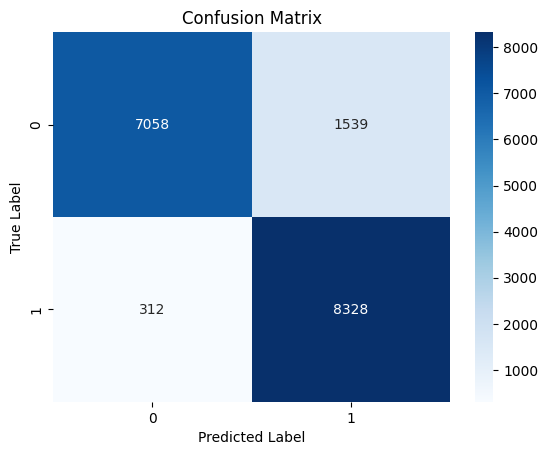

In [2]:
#new under sampleling
#=======================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.under_sampling import NearMiss
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
path="/content/drive/MyDrive/1lvtn/Android_RansomewareDataset1.csv"
df = pd.read_csv(path, index_col=0)

print(df.info())

# Prepare the data
X = df.drop('Label', axis=1)
y = df['Label']

# Apply NearMiss for under-sampling the majority class
nm = NearMiss(version=1)  # You can try version 1, 2, or 3
X_res, y_res = nm.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize the model
# clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=1)
clf = DecisionTreeClassifier( max_depth=15, min_samples_split=2, min_samples_leaf=15, random_state=1, class_weight='balanced')

# Train the model
clf.fit(X_res, y_res)

# Predict on the test set
y_test_pred = clf.predict(X_test)

# Evaluate the model on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Evaluate precision, recall, and F1-score
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_test_pred))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
#==================================================================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392034 entries, 0 to 392033
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Flow ID                  392034 non-null  int64  
 1   Source IP                392034 non-null  int64  
 2   Source Port              392034 non-null  int64  
 3   Destination IP           392034 non-null  int64  
 4   Destination Port         392034 non-null  int64  
 5   Protocol                 392034 non-null  int64  
 6   Flow Duration            392034 non-null  int64  
 7   Fwd Packet Length Max    392034 non-null  int64  
 8   Fwd Packet Length Min    392034 non-null  int64  
 9   Bwd Packet Length Min    392034 non-null  int64  
 10  Init_Win_bytes_forward   392034 non-null  int64  
 11  Init_Win_bytes_backward  392034 non-null  int64  
 12  act_data_pkt_fwd         392034 non-null  int64  
 13  min_seg_size_forward     392034 non-null  int64  
 14  Acti

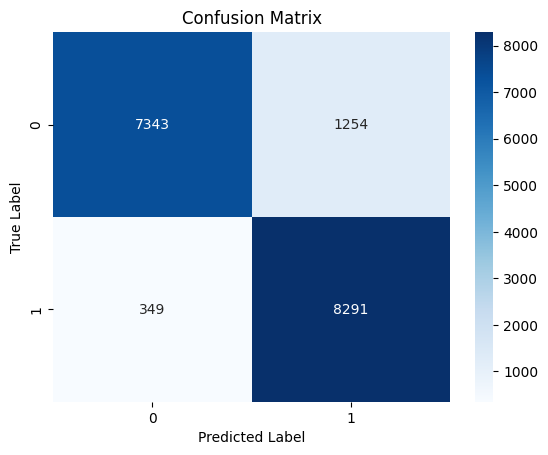

In [1]:
#new under sampleling
#=======================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.under_sampling import NearMiss
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
path="/content/drive/MyDrive/1lvtn/Android_RansomewareDataset3.csv"
df = pd.read_csv(path)

print(df.info())

# Prepare the data
X = df.drop('Label', axis=1)
y = df['Label']

# Apply NearMiss for under-sampling the majority class
nm = NearMiss(version=1)  # You can try version 1, 2, or 3
X_res, y_res = nm.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize the model
# clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=1)
clf = DecisionTreeClassifier( max_depth=15, min_samples_split=2, min_samples_leaf=15, random_state=1, class_weight='balanced')

# Train the model
clf.fit(X_res, y_res)

# Predict on the test set
y_test_pred = clf.predict(X_test)

# Evaluate the model on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Evaluate precision, recall, and F1-score
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_test_pred))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
#==================================================================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392034 entries, 0 to 392033
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Flow ID                  392034 non-null  int64  
 1   Source IP                392034 non-null  int64  
 2   Source Port              392034 non-null  int64  
 3   Destination IP           392034 non-null  int64  
 4   Destination Port         392034 non-null  int64  
 5   Protocol                 392034 non-null  int64  
 6   Flow Duration            392034 non-null  int64  
 7   Fwd Packet Length Max    392034 non-null  int64  
 8   Fwd Packet Length Min    392034 non-null  int64  
 9   Bwd Packet Length Min    392034 non-null  int64  
 10  Init_Win_bytes_forward   392034 non-null  int64  
 11  Init_Win_bytes_backward  392034 non-null  int64  
 12  act_data_pkt_fwd         392034 non-null  int64  
 13  min_seg_size_forward     392034 non-null  int64  
 14  Acti

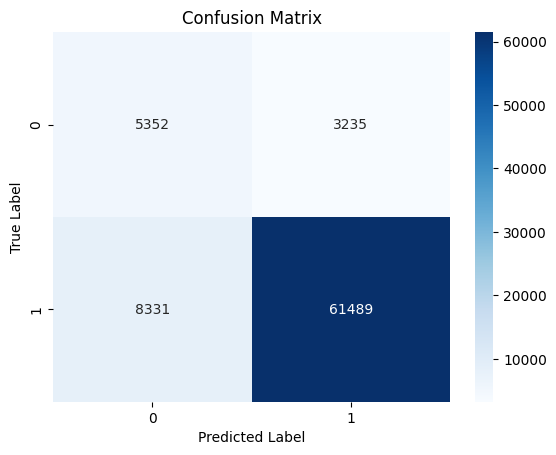

In [6]:
#new under sampleling
#=======================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.under_sampling import NearMiss
import seaborn as sns
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

# Load the dataset
path="/content/drive/MyDrive/1lvtn/Android_RansomewareDataset3.csv"
df = pd.read_csv(path)

print(df.info())

# Prepare the data
X = df.drop('Label', axis=1)
y = df['Label']

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
# clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=1)
clf = DecisionTreeClassifier( max_depth=15, min_samples_split=2, min_samples_leaf=15, random_state=1, class_weight='balanced')

# Train the model
clf.fit(X_train_res, y_train_res)

# Predict on the test set
y_test_pred = clf.predict(X_test)

# Evaluate the model on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Evaluate precision, recall, and F1-score
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_test_pred))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
#==================================================================

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Flow Duration',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Bwd Packet Length Min', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active Mean', 'Active Std', 'Active Max', 'Idle Mean', 'Idle Std',
       'Label'],
      dtype='object')
Train Accuracy: 92.85%
Test Accuracy: 92.30%
Precision: 88.04%
Recall: 97.95%
F1 Score: 92.73%
Confusion Matrix:
[[7447 1150]
 [ 177 8463]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      8597
           1       0.88      0.98      0.93      8640

    accuracy                           0.92     17237
   macro avg       0.93      0.92      0.92     17237
weighted avg       0.93      0.92      0.92     17237



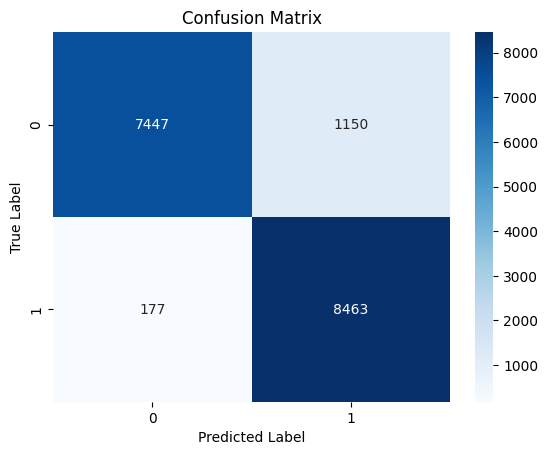

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss

# Load the dataset
path="/content/drive/MyDrive/1lvtn/Android_RansomewareDataset3.csv"
df = pd.read_csv(path)
print(df.columns)

# Prepare the data
X = df.drop('Label', axis=1)
y = df['Label']

nm = NearMiss()  # You can try version 1, 2, or 3
X_res, y_res = nm.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier with balanced class weights
clf = DecisionTreeClassifier(max_depth=15, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train the model
clf.fit(X_res, y_res)

# Predict on train and test sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Evaluate the model on the train set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Evaluate with precision, recall, f1-score
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
 

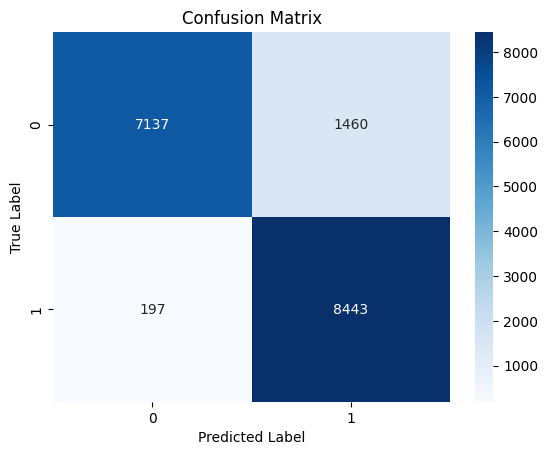

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss

# Load the dataset
path="/content/drive/MyDrive/1lvtn/Android_RansomewareDataset1.csv"
df = pd.read_csv(path, index_col=0)
print(df.columns)

# Prepare the data
X = df.drop('Label', axis=1)
y = df['Label']

nm = NearMiss()  # You can try version 1, 2, or 3
X_res, y_res = nm.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier with balanced class weights
clf = DecisionTreeClassifier(max_depth=15, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train the model
clf.fit(X_res, y_res)

# Predict on train and test sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Evaluate the model on the train set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Evaluate with precision, recall, f1-score
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Counter({1: 279154, 0: 34473})
Original training set class distribution: Counter({1: 279154, 0: 34473})
Resampled training set class distribution: Counter({1: 279154, 0: 279154})
Train Accuracy: 98.81%
Test Accuracy: 91.16%
Precision: 96.33%
Recall: 93.64%
F1 Score: 94.96%
Confusion Matrix:
[[ 6129  2489]
 [ 4442 65347]]
              precision    recall  f1-score   support

           0       0.58      0.71      0.64      8618
           1       0.96      0.94      0.95     69789

    accuracy                           0.91     78407
   macro avg       0.77      0.82      0.79     78407
weighted avg       0.92      0.91      0.92     78407



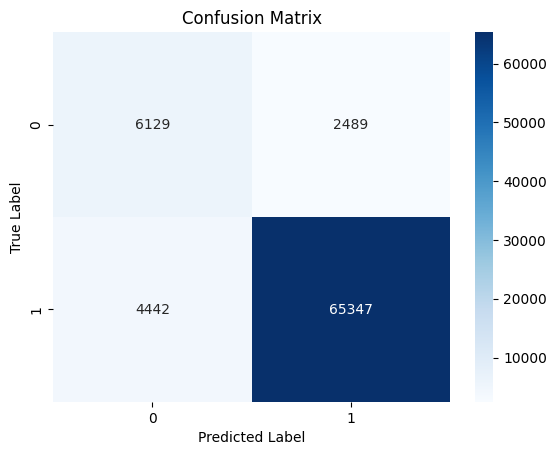

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import NearMiss
from collections import Counter
from imblearn.over_sampling import SMOTE
from collections import Counter
# Load the dataset
path = '/content/drive/MyDrive/1lvtn/Android_RansomewareDataset3.csv'
df = pd.read_csv(path)

# Prepare the data
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print(Counter(y_train))

# Check the class distribution after NearMiss
print(f'Original training set class distribution: {Counter(y_train)}')
print(f'Resampled training set class distribution: {Counter(y_train_res)}')

# Initialize the Decision Tree model
#  {'max_depth': 25, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}



clf = DecisionTreeClassifier(max_depth=None, min_samples_split=7, min_samples_leaf=1, random_state=42)

# Train the model on the resampled training set
clf.fit(X_train_res, y_train_res)

# Predict on train and test sets
y_train_pred = clf.predict(X_train_res)
y_test_pred = clf.predict(X_test)

# Evaluate the model on the resampled train set
train_accuracy = accuracy_score(y_train_res, y_train_pred)
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')

# Evaluate the model on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Evaluate the model on the test set with precision, recall, f1-score
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
#Setting values for the parameters
#n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 10, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
max_features = [1, 2, 5, 10]

#Creating a dictionary for the hyper parameters
hyperT = dict(max_depth = max_depth, min_samples_split = min_samples_split,
              min_samples_leaf = min_samples_leaf, max_features=max_features)

#Applying GridSearchCV to get the best value for hyperparameters
gridT = GridSearchCV(tree, hyperT, cv = 3, verbose = 1, n_jobs = -2)
bestT = gridT.fit(X_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [10]:
print('The best hyper parameters are: \n',gridT.best_params_)


The best hyper parameters are: 
 {'max_depth': 25, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


Train Accuracy: 99.43%
Test Accuracy: 96.34%
Precision: 98.04%
Recall: 97.84%
F1 Score: 97.94%
Confusion Matrix:
[[ 7223  1364]
 [ 1506 68314]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      8587
           1       0.98      0.98      0.98     69820

    accuracy                           0.96     78407
   macro avg       0.90      0.91      0.91     78407
weighted avg       0.96      0.96      0.96     78407



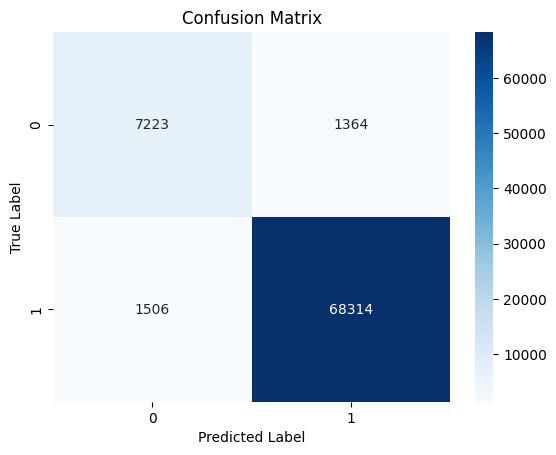

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
path = '/content/drive/MyDrive/1lvtn/Android_RansomewareDataset1.csv'
df = pd.read_csv(path)

# Prepare the data
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(max_depth=None, min_samples_split=7, min_samples_leaf=1, random_state=42)

# clf = DecisionTreeClassifier(random_state=42)


# Train the model
clf.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Evaluate the model on train set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')

# Evaluate the model on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Evaluate the model on the test set with precision, recall, f1-score
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Test dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78407 entries, 0 to 78406
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Flow ID                  78407 non-null  int64  
 1   Source IP                78407 non-null  int64  
 2   Source Port              78407 non-null  int64  
 3   Destination IP           78407 non-null  int64  
 4   Destination Port         78407 non-null  int64  
 5   Protocol                 78407 non-null  int64  
 6   Flow Duration            78407 non-null  int64  
 7   Fwd Packet Length Max    78407 non-null  int64  
 8   Fwd Packet Length Min    78407 non-null  int64  
 9   Bwd Packet Length Min    78407 non-null  int64  
 10  Init_Win_bytes_forward   78407 non-null  int64  
 11  Init_Win_bytes_backward  78407 non-null  int64  
 12  act_data_pkt_fwd         78407 non-null  int64  
 13  min_seg_size_forward     78407 non-null  int64  
 14  Ac

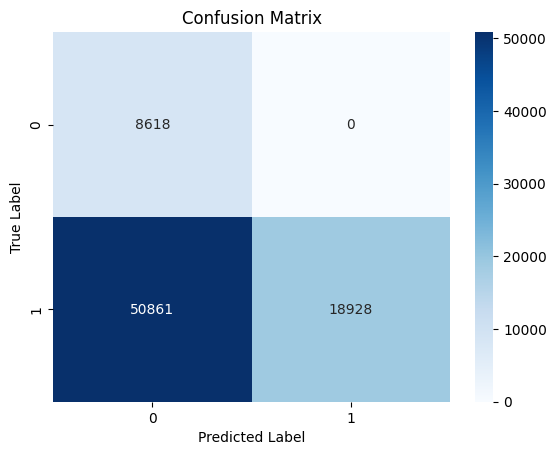

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE


# Load the test dataset
test_path = '/content/drive/MyDrive/1lvtn/test_data.csv'  # Đường dẫn đến file test
test_df = pd.read_csv(test_path)

print("\nTest dataset info:")
print(test_df.info())


# Load the dataset
path="/content/drive/MyDrive/1lvtn/Android_RansomewareDataset3.csv"
df = pd.read_csv(path)
print(df.columns)

# Prepare the data
X = df.drop('Label', axis=1)
y = df['Label']

X_test = test_df.drop('Label', axis=1)  # X_test là tất cả các cột trừ cột 'Label'
y_test = test_df['Label']  # y_test là cột 'Label'

# smote = SMOTE(random_state=42)
# X_res, y_res = smote.fit_resample(X, y)
nm = NearMiss()  # You can try version 1, 2, or 3
X_res, y_res = nm.fit_resample(X, y)

# Split the resampled data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier with balanced class weights
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train the model
clf.fit(X_res, y_res)

# Predict on train and test sets
y_train_pred = clf.predict(X_res)
y_test_pred = clf.predict(X_test)

# Evaluate the model on the train set
train_accuracy = accuracy_score(y_res, y_train_pred)
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')

# # Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Evaluate with precision, recall, f1-score
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Train Accuracy: 100.00%
Test Accuracy: 35.13%
Precision: 100.00%
Recall: 27.12%
F1 Score: 42.67%
Confusion Matrix:
[[ 8618     0]
 [50861 18928]]
              precision    recall  f1-score   support

           0       0.14      1.00      0.25      8618
           1       1.00      0.27      0.43     69789

    accuracy                           0.35     78407
   macro avg       0.57      0.64      0.34     78407
weighted avg       0.91      0.35      0.41     78407



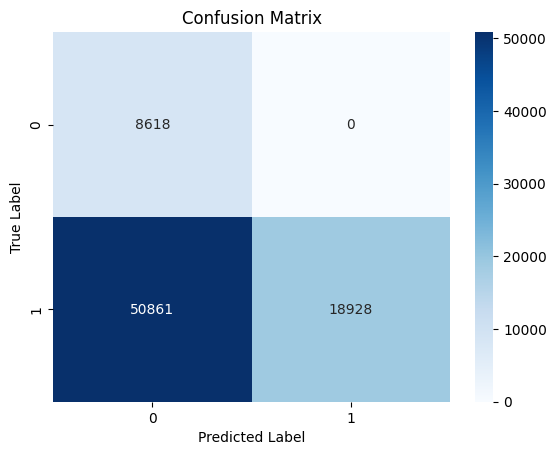

In [2]:
# Predict on train and test sets
y_train_pred = clf.predict(X_res)
y_test_pred = clf.predict(X_test)

# Evaluate the model on the train set
train_accuracy = accuracy_score(y_res, y_train_pred)
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')

# # Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Evaluate with precision, recall, f1-score
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Train Accuracy: 98.45%
Test Accuracy: 92.32%
Precision: 96.00%
Recall: 95.36%
F1 Score: 95.68%
Confusion Matrix:
[[ 5811  2776]
 [ 3242 66578]]
              precision    recall  f1-score   support

           0       0.64      0.68      0.66      8587
           1       0.96      0.95      0.96     69820

    accuracy                           0.92     78407
   macro avg       0.80      0.82      0.81     78407
weighted avg       0.93      0.92      0.92     78407



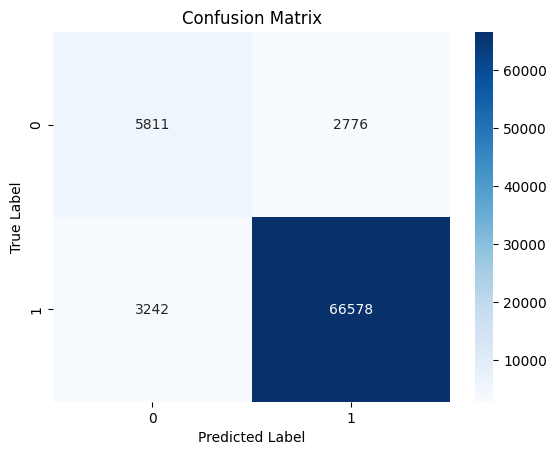

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
path = '/content/drive/MyDrive/1lvtn/Android_RansomewareDataset3.csv'
df = pd.read_csv(path)

# Prepare the data
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




clf = DecisionTreeClassifier(max_depth=None, min_samples_split=7, min_samples_leaf=1, random_state=42)

# clf = DecisionTreeClassifier(random_state=42)


# Train the model
clf.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Evaluate the model on train set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')

# Evaluate the model on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Evaluate the model on the test set with precision, recall, f1-score
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# prompt: hanlde imbalance data

from imblearn.over_sampling import SMOTE

# ... (Your existing code for loading and preparing data) ...

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ... (Your existing code for initializing, training, and evaluating the model) ...

# Train the model with resampled data
clf.fit(X_train_resampled, y_train_resampled)

# ... (Your existing code for predicting and evaluating the model) ...


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss

# Load the dataset
path="/content/drive/MyDrive/1lvtn/Android_RansomewareDataset3.csv"
df = pd.read_csv(path)
print(df.columns)

# Prepare the data
X = df.drop('Label', axis=1)
y = df['Label']

# Chia dữ liệu với stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Áp dụng SMOTE để cân bằng dữ liệu
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Huấn luyện mô hình
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_res, y_train_res)

# Dự đoán trên tập test
y_pred = rf_clf.predict(X_test)

# Đánh giá mô hình
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


y_train_pred = rf_clf.predict(X_train)

# Evaluate the model on train set
train_accuracy = accuracy_score(y_train_res, y_train_pred)
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')

# Evaluate the model on test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Evaluate the model on the test set with precision, recall, f1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()





Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Flow Duration',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Bwd Packet Length Min', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active Mean', 'Active Std', 'Active Max', 'Idle Mean', 'Idle Std',
       'Label'],
      dtype='object')
              precision    recall  f1-score   support

           0       0.71      0.67      0.69      8618
           1       0.96      0.97      0.96     69789

    accuracy                           0.93     78407
   macro avg       0.84      0.82      0.83     78407
weighted avg       0.93      0.93      0.93     78407

[[ 5769  2849]
 [ 2316 67473]]


              precision    recall  f1-score   support

           0       0.71      0.67      0.69      8618
           1       0.96      0.97      0.96     69789

    accuracy                           0.93     78407
   macro avg       0.84      0.82      0.83     78407
weighted avg       0.93      0.93      0.93     78407

Confusion Matrix (Test Set):
[[ 5769  2849]
 [ 2316 67473]]
Train Accuracy: 100.00%
Test Accuracy: 93.41%
Precision: 95.95%
Recall: 96.68%
F1 Score: 96.31%


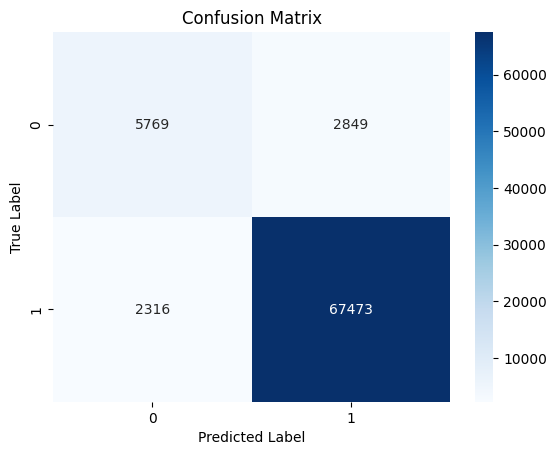

In [17]:
# Predict on the test set
y_test_pred = rf_clf.predict(X_test)

# Evaluate the model on the test set
print(classification_report(y_test, y_test_pred))
print(f'Confusion Matrix (Test Set):\n{confusion_matrix(y_test, y_test_pred)}')

# Evaluate the model on the train set (using oversampled training data)
y_train_pred = rf_clf.predict(X_train_res)

# Print training and test accuracy
train_accuracy = accuracy_score(y_train_res, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Precision, Recall, F1 on Test Set
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()